## Network science 3

In [51]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import collections

### BA modelを実装してみる
Preferential attachmentは上手いこと実装

In [80]:
def barabasi_model(n,k):
    if(k>5):
        print("Please set 5>k")
        return 0
    
    edges_list=np.array([[0,1],[0,2],[0,3],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]])
    target=edges_list.flatten()
    
    for i in range(n-5):
        select_list=np.array([])
        while(len(select_list)<k):
            r=np.random.randint(0,len(target))
            if(target[r] not in select_list):
                edges_list=np.vstack((edges_list,[i+5,target[r]]))
                select_list=np.append(select_list,target[r])
        target=np.append(target,select_list)
        for tt in range(k):
            target=np.append(target,i+5)
    
    return edges_list

In [81]:
#リストで出力
elist=barabasi_model(150,4)

#networkxに入れてどうなっているか確認
G=nx.Graph()
G.add_edges_from(elist)

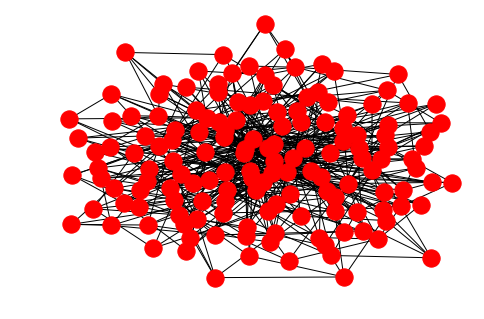

In [82]:
%matplotlib inline
nx.draw_spring(G)

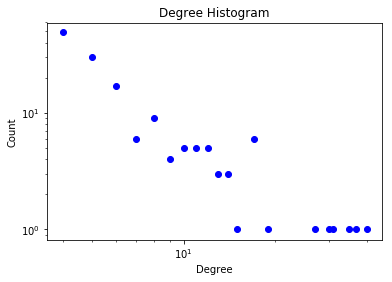

In [83]:
# Sampleコードを引用したもの、次数分布を示す(log-log)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt, color='b')
#plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

ちゃんと実装されている

## Growing Exponential Network 実装

In [84]:

def GEN(n,k):
    if(k>5):
        print("Please set 5>k")
        return 0
    
    edges_list=np.array([[0,1],[0,2],[0,3],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]])
    target=np.array([0,1,2,3,4])
    
    for i in range(n-5):
        select_list=np.array([])
        while(len(select_list)<k):
            r=np.random.randint(0,len(target))
            if(target[r] not in select_list):
                edges_list=np.vstack((edges_list,[i+5,target[r]]))
                select_list=np.append(select_list,target[r])
        target=np.append(target,i+5)
    
    return edges_list

In [85]:
gen_list=GEN(150,4)
G=nx.Graph()
G.add_edges_from(gen_list)

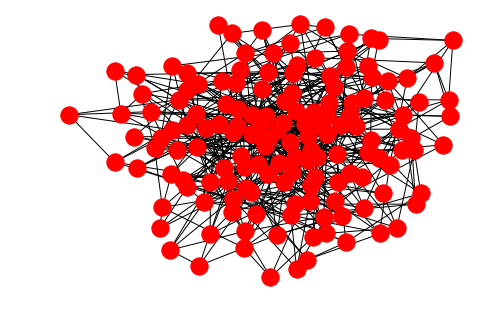

In [86]:
nx.draw_spring(G)

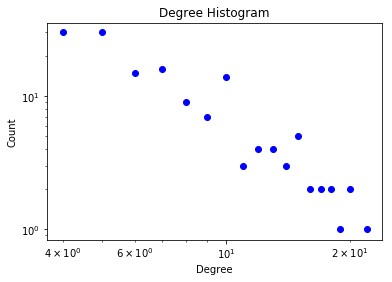

In [87]:
# Sampleコードを引用したもの、次数分布を示す(log-log)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt, color='b')
#plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

これだけだと分かりづらいのでBA modelと比較

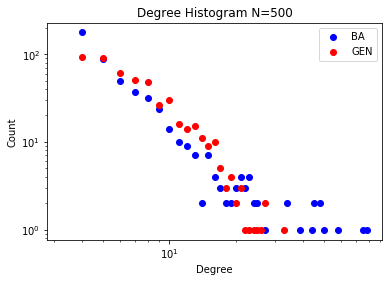

In [88]:
n=500
k=4
ba_list=barabasi_model(n,k)
gen_list=GEN(n,k)

G_ba=nx.Graph()
G_gen=nx.Graph()
G_ba.add_edges_from(ba_list)
G_gen.add_edges_from(gen_list)

degree_sequence = sorted([d for n, d in G_ba.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt, color='b',label='BA')
#plt.bar(deg, cnt, width=0.80, color='b')


degree_sequence_gen = sorted([d for n, d in G_gen.degree()], reverse=True)  # degree sequence
degreeCount_gen = collections.Counter(degree_sequence_gen)
deg_gen, cnt_gen = zip(*degreeCount_gen.items())

plt.scatter(deg_gen, cnt_gen, color='r',label='GEN')

plt.title("Degree Histogram N="+str(n))
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()

plt.show()